In [2]:
# import libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',500)

import folium
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')

In [3]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


#    
## Buatlah Histogram untuk menampilkan distribusi data harga rumah (kolom “Price”)! 
## Tambahkan judul “Distribusi Harga Rumah” berukuran 15!     
## Tidak ada ketentuan pilihan warna, ukuran, dan library yang digunakan.     

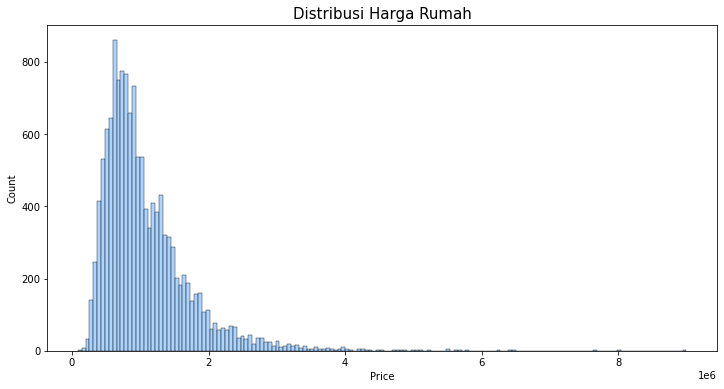

In [10]:
plt.figure(figsize=(12,6))
sns.histplot(df['Price'])
plt.title('Distribusi Harga Rumah', size=15)
plt.show()

#   
## Buatlah Box Plot untuk menampilkan distribusi data jarak ke CBD (kolom “Distance”)! 
## Buatlah Box Plot “Distance” untuk tiap nama region (kolom “Regionname”)!  
## Tambahkan judul ‘Distribusi Jarak ke CBD berdasarkan Nama Region’ berukuran 15!   
## Tidak ada ketentuan pilihan warna, ukuran, dan library yang digunakan.  

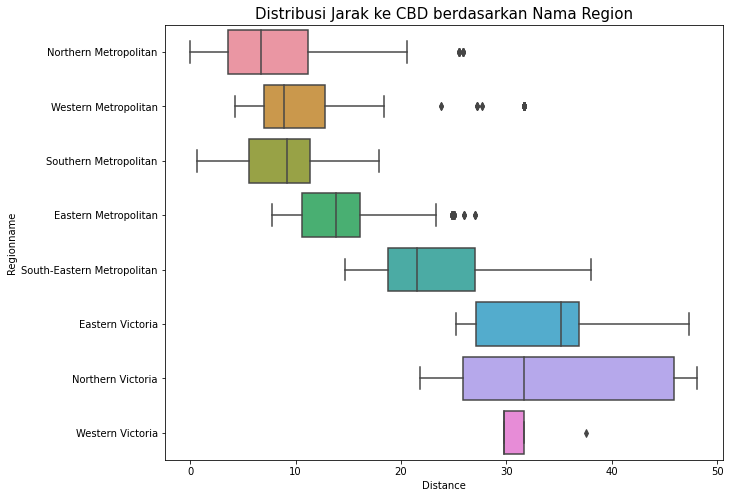

In [22]:
plt.figure(figsize=(10,8))

sns.boxplot(data=df, orient='h', y='Regionname', x='Distance')
plt.title('Distribusi Jarak ke CBD berdasarkan Nama Region', size=15)
plt.show()

# 
## Buatlah Bar Plot (diagram batang) untuk membandingkan nilai median harga rumah (kolom “Price”) di tiap tipe rumah (kolom “Type”)!   
## Tambahkan judul ‘Perbandingan Nilai Median Harga Rumah’ berukuran 15!   
## Tidak ada ketentuan pilihan warna, ukuran, dan library yang digunakan.   

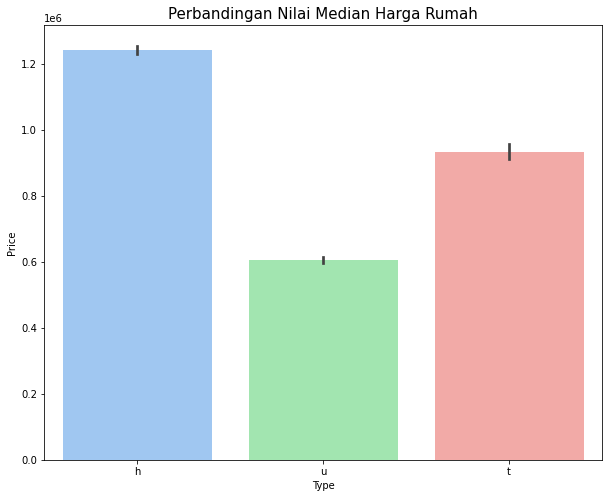

In [23]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x='Type', y='Price')
plt.title('Perbandingan Nilai Median Harga Rumah', size=15)

plt.show()

# 
## Buatlah Scatter Plot (diagram titik) untuk menampilkan korelasi antara harga rumah (kolom “Price”) dengan Jarak ke CBD (kolom “Distance”)!   
## Bedakan warna titik berdasarkan tipe rumah (kolom “Type”)!   
## Tambahkan judul ‘Korelasi Harga Rumah dan Jarak Rumah ke CBD’ berukuran 15!
## Tidak ada ketentuan pilihan ukuran dan library yang digunakan.   

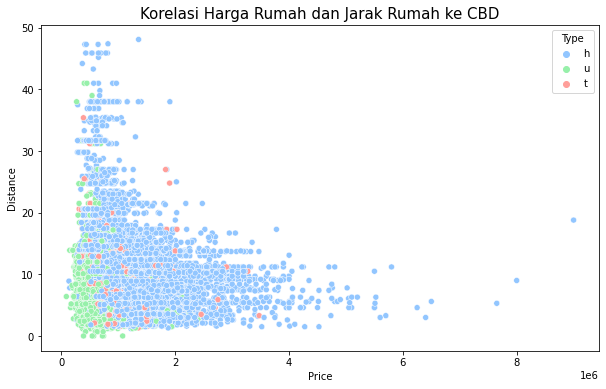

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Price', y='Distance', hue='Type')
plt.title('Korelasi Harga Rumah dan Jarak Rumah ke CBD', size=15)
plt.show()

#   
## Konversi kolom “Date” menjadi tipe data datetime64. Buatlah kolom baru bernama ‘Month’ hasil ekstraksi data bulan dari kolom “Date”!  
## Buatlah Line Plot (diagram garis) untuk menampilkan tren perkembangan harga rumah (kolom “Price”) tiap bulan!   
## Bedakan warna garis berdasarkan tipe rumah (kolom “Type”)!   
## Tambahkan judul ‘Tren Harga Rumah per Bulan berdasarkan Tipe Rumah’ berukuran 15! 
## e) Tidak ada ketentuan pilihan ukuran dan library yang digunakan.  
  

In [51]:
df['Month'] = pd.to_datetime(df['Date']).dt.month

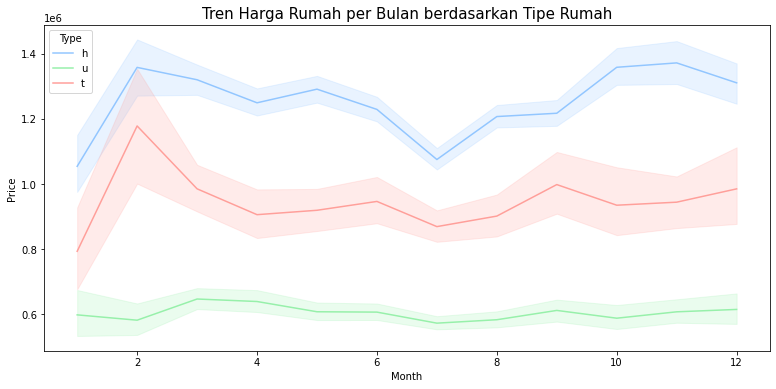

In [55]:
plt.figure(figsize=(13,6))
sns.lineplot(data=df, x='Month', y='Price', hue='Type')
plt.title('Tren Harga Rumah per Bulan berdasarkan Tipe Rumah', size=15)
plt.show()

# 
## Kelompokkan total luas tanah (kolom “Landsize”) berdasarkan region (kolom “Regionname”), lalu simpan ke dalam sebuah DataFrame baru! 
## Dari DataFrame baru tersebut, buatlah Pie Chart (diagram lingkaran) untuk menampilkan proporsi total luas tanah di tiap region! 
## Tambahkan explode agar potongan diagram seakan terpisah! 
## Tambahkan judul ‘Proporsi Luas Tanah tiap Region’ berukuran 20! 
## Tidak ada ketentuan pilihan warna, ukuran, dan library yang digunakan. 

In [69]:
df_pie = df.groupby('Regionname').sum()[['Landsize']].reset_index()
df_pie

,Regionname,Landsize
0,Eastern Metropolitan,932811.0
1,Eastern Victoria,156334.0
2,Northern Metropolitan,2213208.0
3,Northern Victoria,137574.0
4,South-Eastern Metropolitan,276296.0
5,Southern Metropolitan,2390939.0
6,Western Metropolitan,1455153.0
7,Western Victoria,20976.0


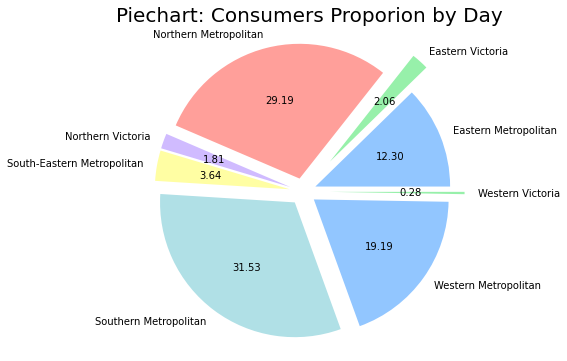

In [84]:
plt.figure(figsize=(8,6))
plt.pie(
    df_pie['Landsize'], 
    labels=df_pie['Regionname'],
    autopct='%.2f', # memberi label data, 2 angka dibelakang koma
    explode=(0.1,0.3,0.1,0.1,0.1,0.1,0.1,0.2) # memberi jarak antar slice, digunakan untuk menonjolkan slice tertentu
)

plt.axis('equal')
plt.title('Piechart: Consumers Proporion by Day', size=20)
plt.show()

# 
## Buatlah terlebih dahulu correlation matrix yang berisi korelasi kolom “Price”, “Distance”, “Landsize”, dan “Rooms”! 
## Dari correlation matrix ini, buatlah Correlation Heatmap untuk memvisualisasikan korelasi antar variabel!   
## Tampilkan data korelasi di heatmap (annot = True) !  
## Tambahkan judul ‘Heatmap Korelasi Harga, Jarak, Luas Tanah dan Jumlah Kamar’ berukuran 20!   
## Tidak ada ketentuan pilihan warna, ukuran, dan library yang digunakan.  



In [86]:
# cek distribusi normal
from scipy.stats import normaltest

kolom_head = ['Price', 'Distance', 'Landsize', 'Rooms']

for i in kolom_head:
    stats, pval = normaltest(df[i])
    if pval<0.05:
        print(f'{i} tidak memiliki distribusi normal')
    else: 
        print(f'{i} memiliki distribusi normal')

Price tidak memiliki distribusi normal
Distance tidak memiliki distribusi normal
Landsize tidak memiliki distribusi normal
Rooms tidak memiliki distribusi normal


In [100]:
# semua variabel memiliki distribusi tidak normal, maka korelasi menggunakan spearman
korelasi = df[['Price', 'Distance', 'Landsize', 'Rooms']].corr(method='spearman')
korelasi

,Price,Distance,Landsize,Rooms
Price,1.000000,-0.129990,0.327200,0.539886
Distance,-0.129990,1.000000,0.417379,0.351416
Landsize,0.327200,0.417379,1.000000,0.485742
Rooms,0.539886,0.351416,0.485742,1.000000


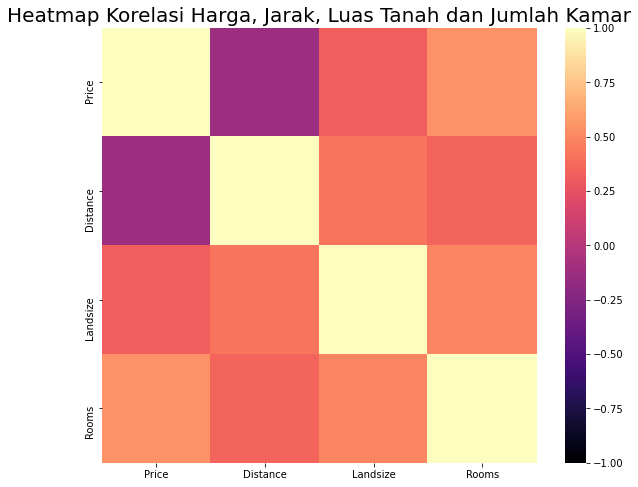

In [110]:
plt.figure(figsize=(10,8))
sns.heatmap(korelasi, # dataset
            center=0, # The value at which to center the colormap when plotting divergant data
            square=True, # true = create square shaped
            vmin=-1, # batas bawah
            vmax=1, # batas atas
            cmap='magma'
) 
plt.title('Heatmap Korelasi Harga, Jarak, Luas Tanah dan Jumlah Kamar', size=20)
plt.show()

#  
## Urutkan data berdasarkan harga (kolom “Price”) dan tampilkan 10 data dari harga rumah tertinggi, kemudian simpan hasilnya ke dalam DataFrame baru!
## Buatlah peta Melbourne yang berlokasi di [-37.8136, 144.9631] dan zoom_start = 11!
## Di dalam peta Melbourne, tambahkan 10 marker sesuai lokasi 10 rumah dengan harga tertinggi!
## Di dalam marker, popup berisi harga rumah dan tooltip berisi alamat rumah.


In [114]:
df_map = df.nlargest(10, 'Price')
df_map


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month
12094,Mulgrave,35 Bevis St,3,h,9000000.0,PI,Hall,29/07/2017,18.8,3170.0,3.0,1.0,1.0,744.0,117.0,1960.0,Monash,-37.93168,145.16126,South-Eastern Metropolitan,7113.0,7
7692,Canterbury,49 Mangarra Rd,5,h,8000000.0,VB,Sotheby's,13/05/2017,9.0,3126.0,5.0,5.0,4.0,2079.0,464.3,1880.0,Boroondara,-37.81790,145.06940,Southern Metropolitan,3265.0,5
9575,Hawthorn,49 Lisson Gr,4,h,7650000.0,S,Abercromby's,17/06/2017,5.3,3122.0,4.0,2.0,4.0,1690.0,284.0,1863.0,Boroondara,-37.82652,145.03052,Southern Metropolitan,11308.0,6
3616,Kew,15 Barry St,6,h,6500000.0,S,Jellis,13/08/2016,5.6,3101.0,6.0,6.0,3.0,1334.0,365.0,1890.0,Boroondara,-37.80290,145.02670,Southern Metropolitan,10331.0,8
12557,Middle Park,136 Page St,5,h,6400000.0,S,Marshall,9/09/2017,3.0,3206.0,5.0,2.0,1.0,553.0,308.0,1920.0,NaN,-37.84908,144.95753,Southern Metropolitan,2019.0,9
6372,Toorak,17 Albany Rd,3,h,6250000.0,S,Kay,15/10/2016,4.6,3142.0,3.0,3.0,2.0,564.0,342.0,2000.0,Stonnington,-37.84860,145.02440,Southern Metropolitan,7217.0,10
7554,Brighton,161 Church St,5,h,5800000.0,PI,Castran,8/04/2017,11.2,3186.0,5.0,4.0,4.0,1276.0,NaN,1880.0,Bayside,-37.91640,144.99740,Southern Metropolitan,10579.0,8
5631,South Yarra,18 Avoca St,4,h,5700000.0,S,Castran,12/11/2016,3.3,3141.0,4.0,2.0,0.0,292.0,272.0,1880.0,Stonnington,-37.83770,144.98940,Southern Metropolitan,14887.0,12
9233,Middle Park,204 Page St,6,h,5600000.0,PI,Marshall,3/06/2017,3.0,3206.0,6.0,4.0,2.0,472.0,328.0,1915.0,Port Phillip,-37.85231,144.96373,Southern Metropolitan,2019.0,3
251,Armadale,367 Dandenong Rd,6,h,5525000.0,S,Marshall,17/09/2016,6.3,3143.0,5.0,3.0,4.0,1491.0,516.0,1935.0,Stonnington,-37.86020,145.01300,Southern Metropolitan,4836.0,9


In [128]:
melbourne_map = folium.Map(
    location=[-37.8136, 144.9631], 
    zoom_start=11
)

for i, col in df_map.iterrows():
    folium.Marker(
        [col['Lattitude'], col['Longtitude']],
        popup = f'''Price: AUD {round(col['Price'] / 1000000,0)} M''',
        tooltip = col['Address'],
        icon = folium.Icon(color='red')
    ).add_to(melbourne_map)

melbourne_map